# 1. Загрузка данных

In [48]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import math

from statsmodels.tsa.stattools import adfuller

In [3]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

# 2. Анализ данных

In [5]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

In [40]:
def show_plots(series, r=3, c=2):
  fig, ax = plt.subplots(r, c, figsize=(14, 8))

  for i, key in enumerate(series):
    ax_i = ax[math.floor(i/c)][i%c]
    series[key].plot(ax=ax_i)

    ax_i.grid()
    ax_i.set_title(key)
    plt.tight_layout()

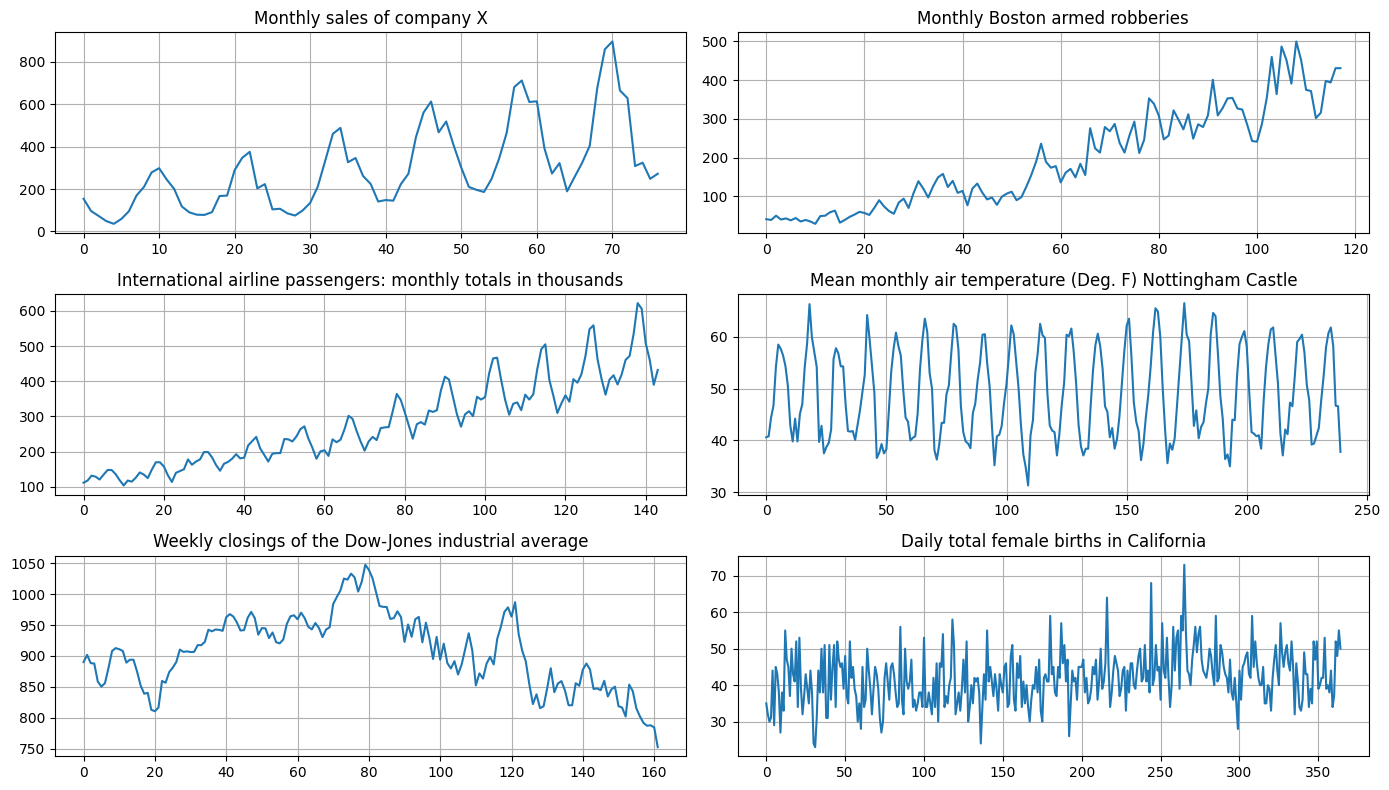

In [41]:
show_plots(all_series)

In [108]:
def test_stationarity(series):
  non_stationary_series = {}

  for key in series.keys():
    print(f'\n{key}:')
    test_value = adfuller(series[key], autolag='AIC')[1]
    print(f'p-value = {test_value}')

    if test_value > 0.05:
      print('non-stationary')
      non_stationary_series[key] = series[key]
    else:
      print('stationary')

In [109]:
test_stationarity(all_series)


Monthly sales of company X:
p-value = 0.9888894205170052
non-stationary

Monthly Boston armed robberies:
p-value = 0.994277563805723
non-stationary

International airline passengers: monthly totals in thousands:
p-value = 0.991880243437641
non-stationary

Mean monthly air temperature (Deg. F) Nottingham Castle:
p-value = 0.016989030222608604
stationary

Weekly closings of the Dow-Jones industrial average:
p-value = 0.6224548515589733
non-stationary

Daily total female births in California:
p-value = 5.2434129901498554e-05
stationary


Для **Mean monthly air temperature (Deg. F) Nottingham Castle** и **Daily total female births in California** значение p-value меньше 0.05, тест Дики Фуллера указывает на то, то ряды стационарные.

Но на графике **Mean monthly air temperature (Deg. F) Nottingham Castle** можно увидеть сезонность.

А для **Daily total female births in California** можно найти интервалы, у которых разное среднее.

# 3. Преобразование Бокса-Кокса

In [39]:
from scipy.stats import boxcox

In [46]:
fix_series = {}

for key in all_series.keys():
  fix_series[key] = pd.Series(boxcox(all_series[key], 0))

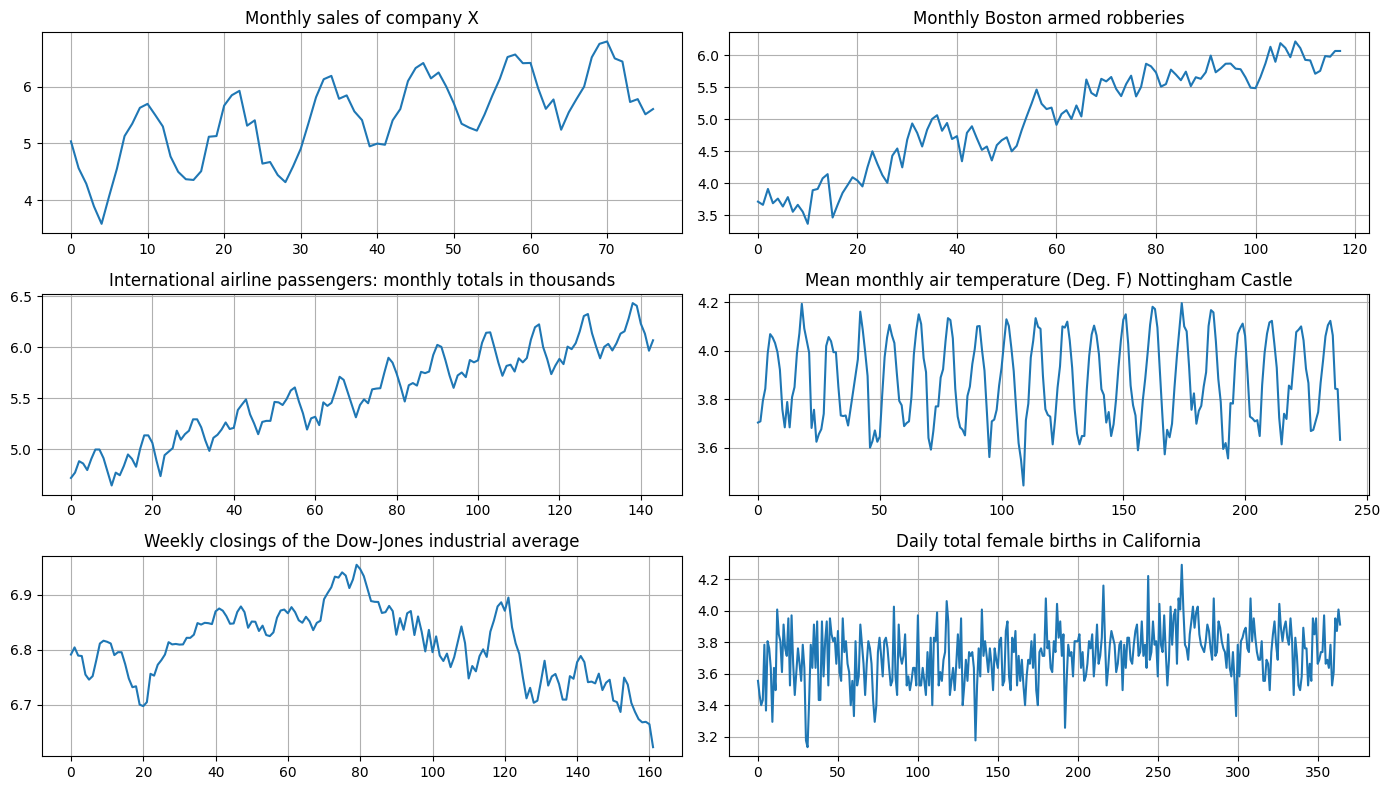

In [47]:
show_plots(fix_series)

# 4. Дифференцирование

In [105]:
for key, values in all_series.items():
  fix_series[key] = pd.Series(np.diff(fix_series[key], 1))

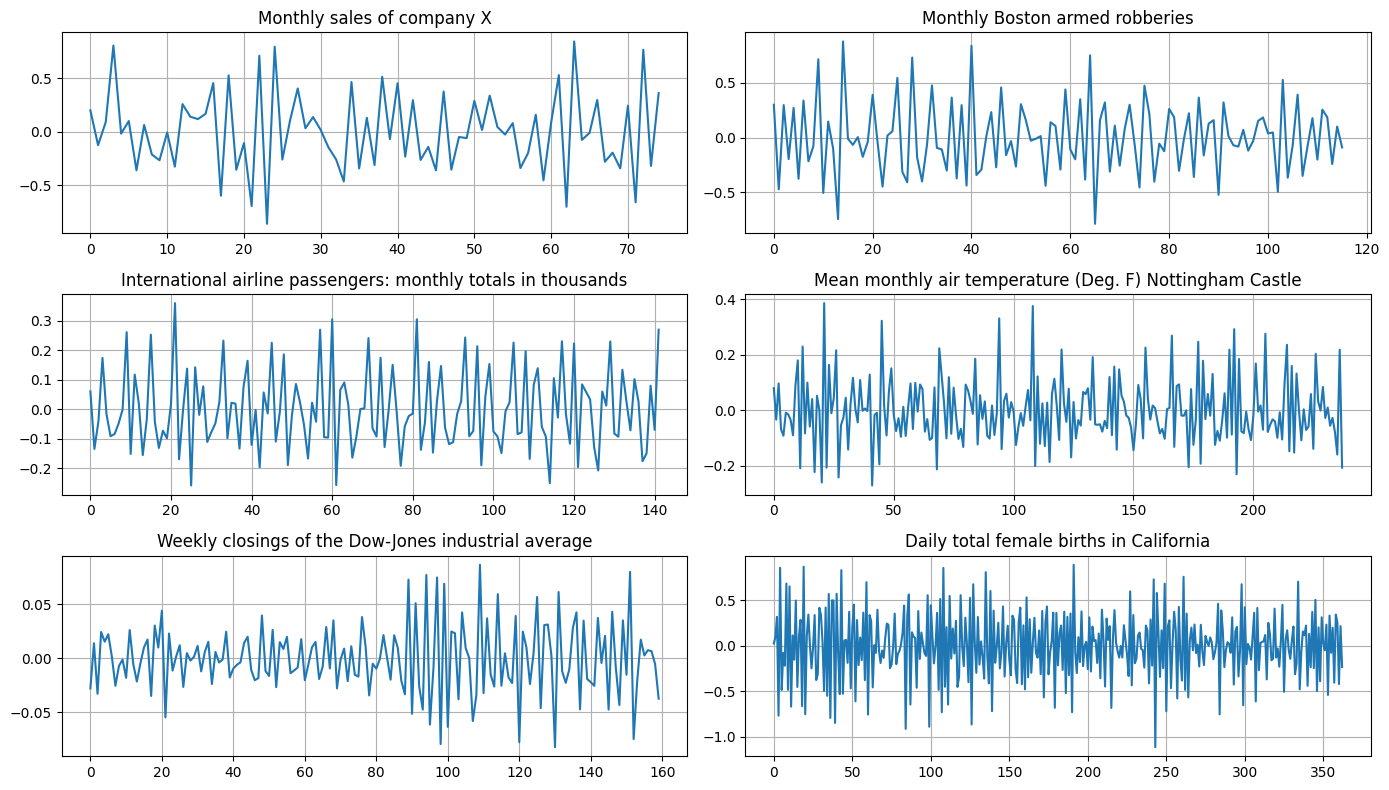

In [106]:
show_plots(fix_series)

In [110]:
test_stationarity(fix_series)


Monthly sales of company X:
p-value = 4.164137050220395e-10
stationary

Monthly Boston armed robberies:
p-value = 7.918035308130433e-09
stationary

International airline passengers: monthly totals in thousands:
p-value = 7.419304549376186e-13
stationary

Mean monthly air temperature (Deg. F) Nottingham Castle:
p-value = 1.834220817426569e-18
stationary

Weekly closings of the Dow-Jones industrial average:
p-value = 1.4059436083696658e-05
stationary

Daily total female births in California:
p-value = 1.5304782908111716e-17
stationary
